In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
keras = tf.keras
import warnings
import matplotlib.pyplot as plt
from collections import Counter


from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline, make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')

In [2]:
def balance_train_data(X, y):
    rus = RandomUnderSampler()
    X_train, y_train = rus.fit_resample(X, y)
    return X_train, y_train

def

In [3]:
data = pd.read_csv('data/clean/Breyer.csv')
data['cleanText'] = data['cleanText'].fillna(' ')

X = data['cleanText'].to_numpy()
y = data['vote'].to_numpy()

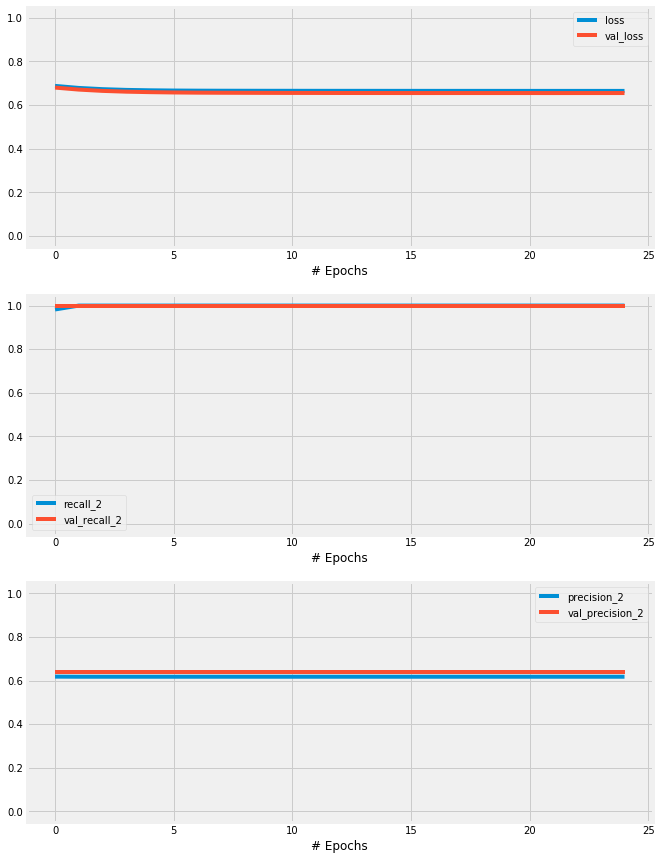

In [6]:
data = pd.read_csv('data/clean/Breyer.csv')
data['cleanText'] = data['cleanText'].fillna(' ')

X = data['cleanText'].to_numpy()
y = data['vote'].to_numpy()

n_epochs=25

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=True)

tfidf = TfidfVectorizer()
train_vectors = tfidf.fit_transform(X_train)
test_vectors = tfidf.transform(X_test)  

model = keras.Sequential()
model.add(keras.layers.Dense(units=32, 
                             input_shape=(train_vectors.shape[1],), 
                             activation='relu'))
model.add(keras.layers.Dense(units=64,  
                             activation='relu'))
model.add(keras.layers.Dense(units=1, 
                             activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='SGD',
            metrics=[keras.metrics.Recall(), keras.metrics.Precision()])

hist = model.fit(train_vectors.toarray(), y_train, batch_size=32, epochs=n_epochs, 
          validation_data=(test_vectors.toarray(), y_test), verbose=0)

fig, ax = plt.subplots(3, 1, figsize=(10, 15))
metrics = ['loss', 'recall', 'precision']
for ax_, metric in zip(ax, metrics):
    keys = hist.history.keys()
    to_use = [key for key in keys if (metric in key)]
    ax_.plot(range(n_epochs), hist.history[to_use[0]], label=to_use[0])
    ax_.plot(range(n_epochs), hist.history[to_use[1]], label=to_use[1])
    ax_.set_ylim(-0.05, 1.05)
    ax_.set_xlabel('# Epochs')
    ax_.legend()


    